# Analysis

This module implements methods for analyzing single models. The purpose of this study is to identify key metabolites that can be used to classify certain community interactions as "competitive" or "commensal". In later investigations of the community we can detect shard uptakes, indicating resource overlap and, thus, competitive interactions between species. Yet, in this case we should also verify that both species need this metabolite to grow, and that a reduction in the metabolite will also lead to a reduction in growth. 

In [17]:
from ncmw.analysis import compute_uptake_sekretion_table, compute_fvas, sekretion_uptake_fva, jaccard_similarity_matrices
from ncmw.visualization import plot_full_fva, plot_medium_fva_range, plot_scaled_medium_growth, plot_scaled_medium_growth, uptake_sekretion_venn_diagrams, jacard_index_similarity_heatmap, plot_growth_sensitivity
from ncmw.utils import get_models
from ncmw.setup_models import set_default_configs_and_snm3_medium, gapfill_medium

In [10]:
models = get_models("models")
for i in range(len(models)):
    models[i] = set_default_configs_and_snm3_medium(models[i])
    models[i], extension = gapfill_medium(models[i])

In [11]:
fvas = compute_fvas(models, 1.)
for model, df in zip(models, fvas):
    sol = model.optimize()
    df["flux"] = sol.fluxes

## Flux variability analysis (FVA)

FVA provides a way to determine possible flux values while still achieving the optimal growth rate. On the other hand, FBA yields a point estimate within this range. In any case, these values shouldn't be too large, which indicates a problem with the metabolic model..

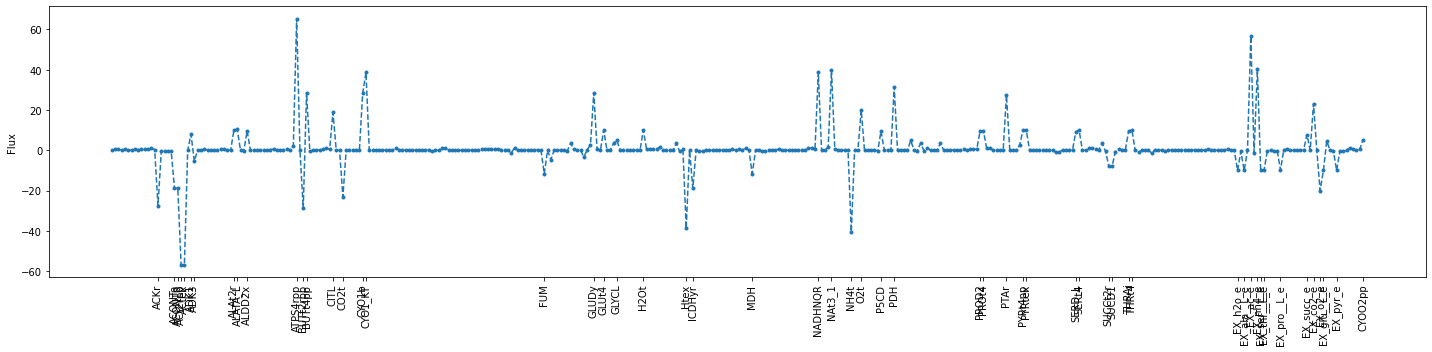

In [12]:
fig = plot_full_fva(fvas[0])

This plots the flux value of any reaction. Thereby we can make sure that none of the values in "unrealistic". 

In any case, to investigate community interaction we are majorly interested only within the FVA results of any exchange reaction. Below we plot these more nicely!

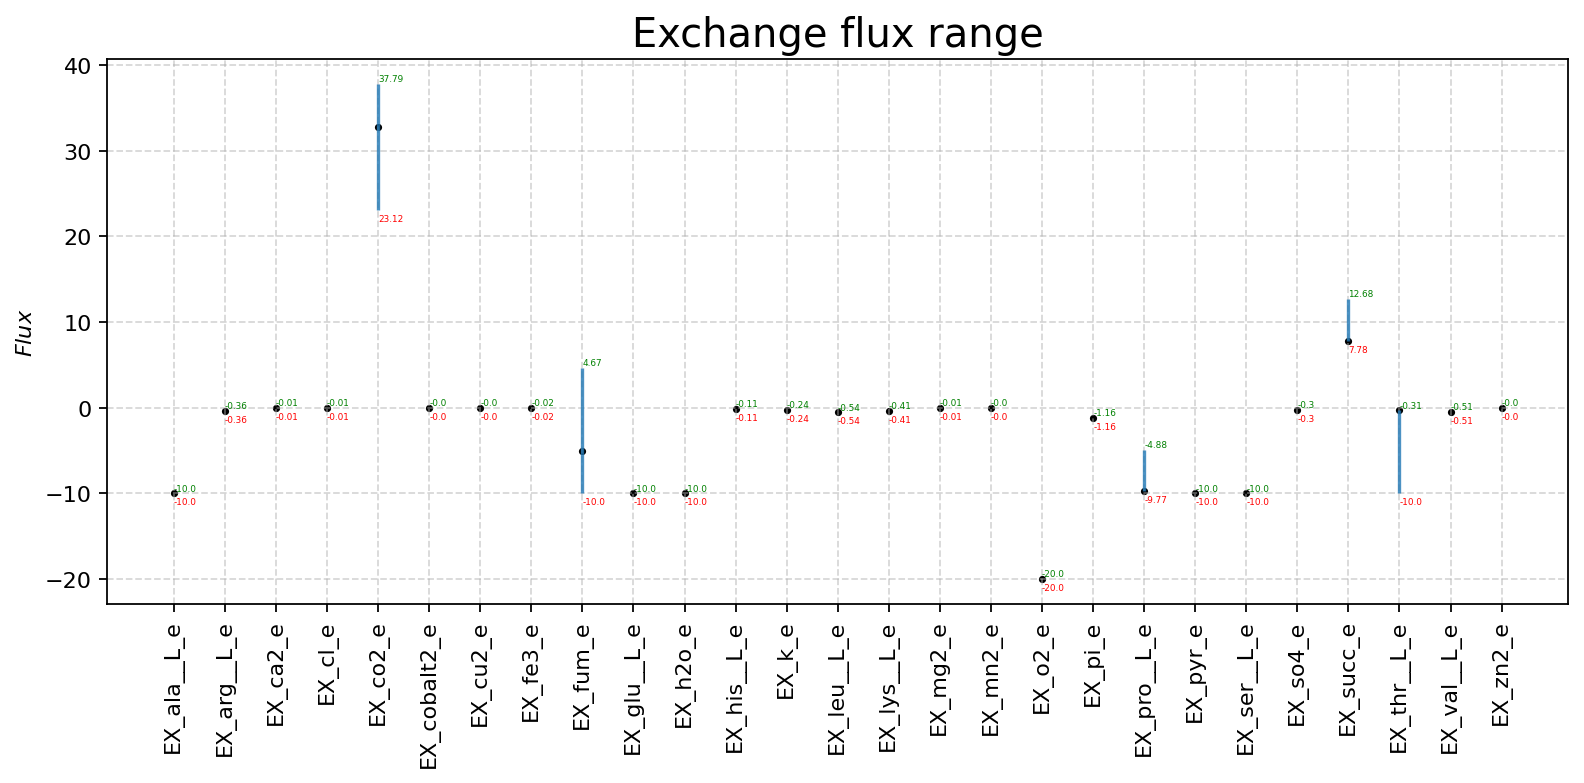

In [7]:
fig = plot_medium_fva_range(models[0])

These can reveal several interesting thinks. For example to achive maximal biomass rate we absolutly require all the EX_o2_e in the medium. Yet we only require some EX_thr__L_e.

## Growth investigateion

Different models may react differently to an increase of metabolites. Thus we are maybe interested how the growth scales with abundance of metabolites. To investigate this we multiply the medium with a certain factor and investigate how the growth changes.

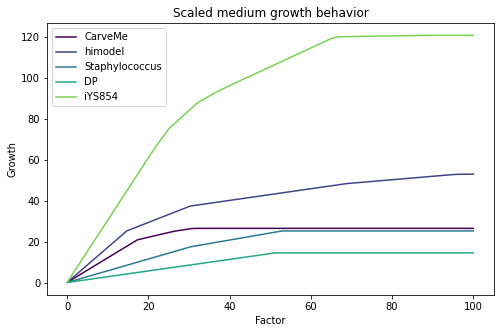

In [13]:
fig = plot_scaled_medium_growth(models)

Next we analyse the sensitivity of the biomass rate to a descreasing the concentration of a single metabolite. This will help us to identify metabolites, which are either "necessary", "necessary only up to a threshold", "irrelevant" or "only in small concentrations".

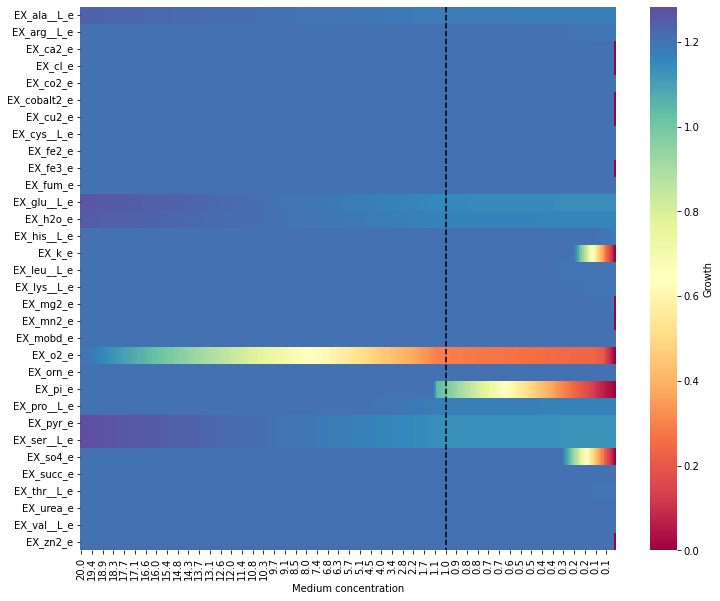

In [20]:
f = plot_growth_sensitivity(models[0], list(models[0].medium.keys()))

## Uptake and sekretion reactions

A major player within a community is what a model must uptake and what it can produce. Produced metabolites can benefit other community member, to many shared uptakes can lead to competition within the communiy (Resource overlap).

In [14]:
uptakes = []
sekretions = []
for i, model in enumerate(models):
    uptake, sekretion = sekretion_uptake_fva(fvas[i])
    uptakes.append(uptake)
    sekretions.append(sekretion)

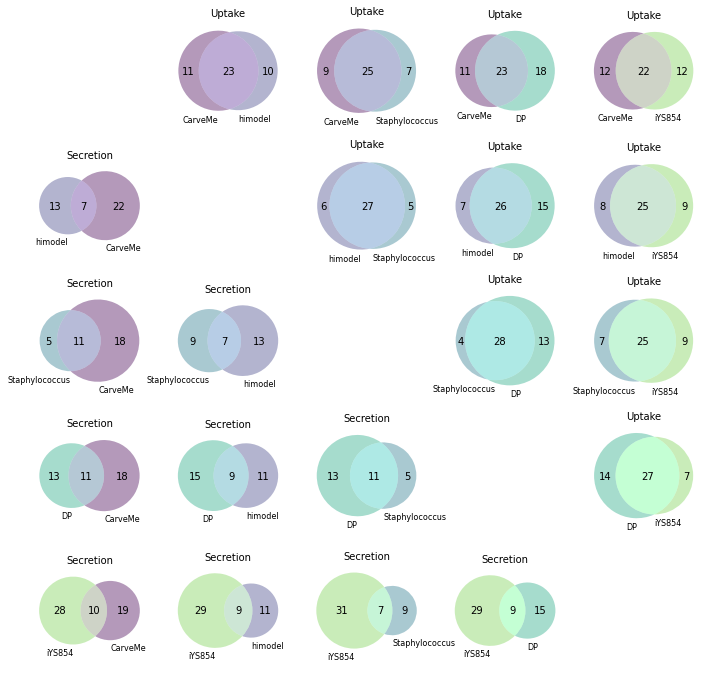

In [15]:
fig = uptake_sekretion_venn_diagrams(models, uptakes, sekretions)

c:\users\manug\desktop\ncmw projects\ncmw\ncmw\visualization\similarity_visualization.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


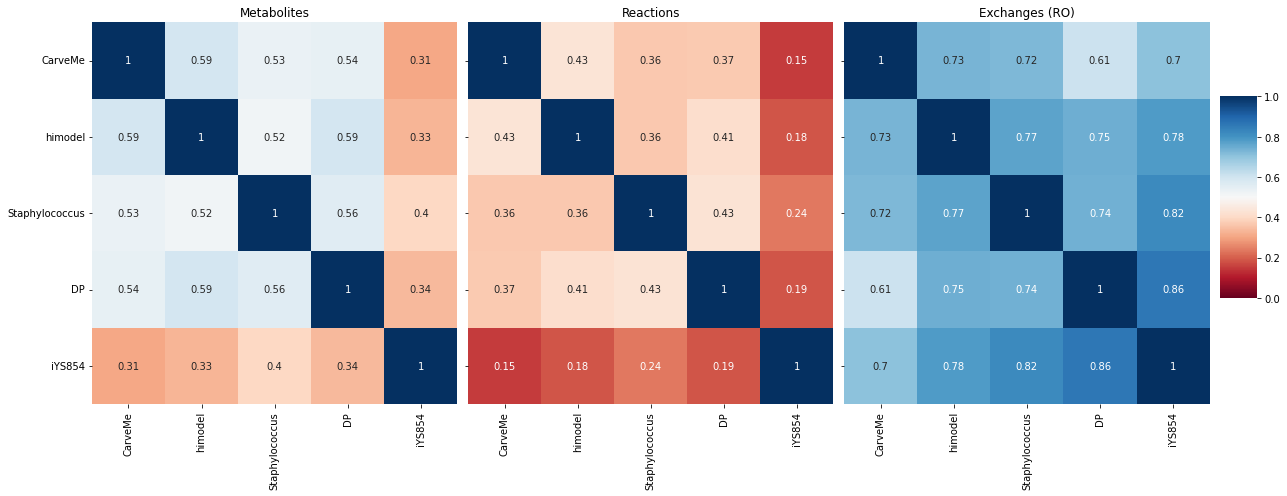

In [16]:
fig = jacard_index_similarity_heatmap(*jaccard_similarity_matrices(models))

All in all we now know much more properties of our models. This can be extremly valuable for the interpreation of results obtained within the community! This also serves as a small overview what the command "ncmw_analysis" can do.